<a href="https://colab.research.google.com/github/gopaps/Robotika_1103213098/blob/main/week%2010/Anda_Figo_Haq_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Langkah 1: Mengimpor library yang diperlukan
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog

In [ ]:
# Langkah 2: Membaca gambar
# Pastikan Anda sudah meng-upload gambar yang akan digunakan
# Jika gambar berada di Google Drive, gunakan path sesuai dengan lokasi gambar Anda.
# Mount Google Drive agar dapat mengakses file
from google.colab import drive
drive.mount('/content/drive')
image = cv2.imread('/content/drive/My Drive/dataset/Ford_Mustang.jpeg')  # Gantilah dengan path gambar Anda
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Mengonversi gambar menjadi grayscale


Mounted at /content/drive


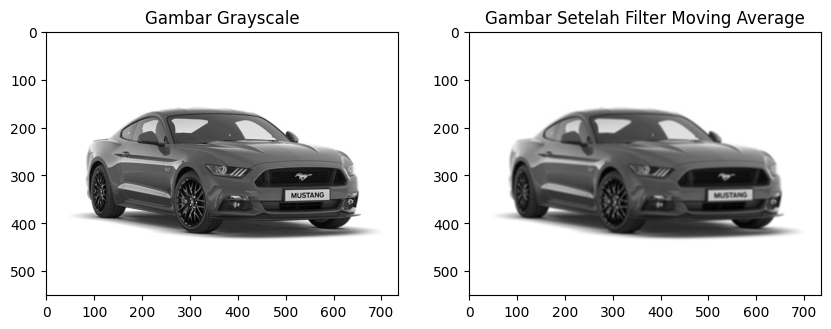

In [ ]:
# Langkah 3: Aplikasi Filter Moving Average
def moving_average_filter(image, kernel_size=5):
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size ** 2)
    return cv2.filter2D(image, -1, kernel)

# Terapkan filter Moving Average pada gambar grayscale
smoothed_image = moving_average_filter(gray_image)

# Menampilkan hasil filter Moving Average
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Gambar Grayscale")
plt.subplot(1, 2, 2)
plt.imshow(smoothed_image, cmap='gray')
plt.title("Gambar Setelah Filter Moving Average")
plt.show()

# Gambar Asli (Grayscale):
 Gambar asli memiliki tekstur atau pola yang lebih tajam, yang terlihat dengan perbedaan intensitas yang lebih kontras antara bagian gelap dan terang. Ini menunjukkan bahwa gambar memiliki detail yang cukup, yang sekarang terlihat lebih halus setelah pengaplikasian filter.

# Gambar Setelah Filter Moving Average:
 Setelah pengaplikasian filter moving average, kita melihat gambar yang lebih rata dan lembut, dengan area yang lebih homogen, terutama pada daerah yang sebelumnya memiliki variasi intensitas tajam.

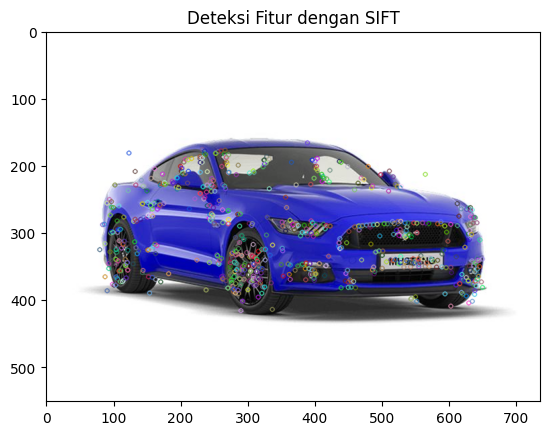

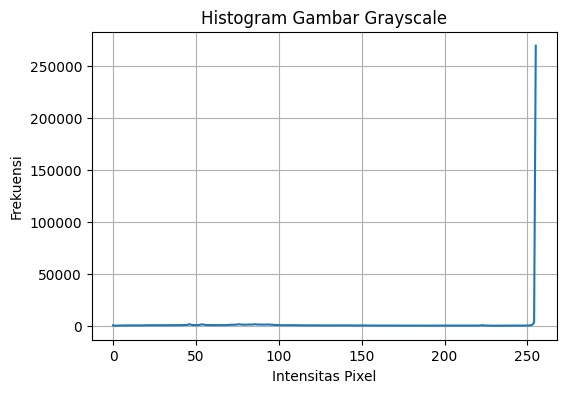

In [ ]:
# Langkah 4: Deteksi Fitur dengan SIFT
# Pastikan OpenCV sudah terinstall dengan versi yang mendukung SIFT
sift = cv2.SIFT_create()  # Membuat objek SIFT
keypoints, descriptors = sift.detectAndCompute(gray_image, None)

# Menampilkan gambar dengan keypoints SIFT
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)
plt.imshow(image_with_keypoints)
plt.title("Deteksi Fitur dengan SIFT")
plt.show()

# Langkah 5: Representasi Histogram Gambar
# Menghitung histogram dari gambar grayscale
histogram = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

# Menampilkan histogram
plt.figure(figsize=(6, 4))
plt.plot(histogram)
plt.title("Histogram Gambar Grayscale")
plt.xlabel("Intensitas Pixel")
plt.ylabel("Frekuensi")
plt.grid(True)
plt.show()

# Deteksi Fitur dengan SIFT:
Keypoints yang terlihat pada gambar ini menunjukkan deteksi titik-titik fitur atau keypoints yang teridentifikasi oleh algoritma SIFT. Setiap titik pada gambar yang dipandang sebagai fitur yang kuat (seperti tepi, sudut, atau pola unik) akan diberi tanda dengan lingkaran kecil atau tanda khusus lainnya.

# Histogram Gambar:
Distribusi Intensitas: Histogram yang ditampilkan menunjukkan distribusi intensitas piksel gambar grayscale. Jika histogram tersebar rata di seluruh rentang 0 hingga 255, berarti gambar memiliki variasi pencahayaan yang baik. Jika ada puncak tajam, itu berarti gambar memiliki banyak area dengan intensitas yang seragam.



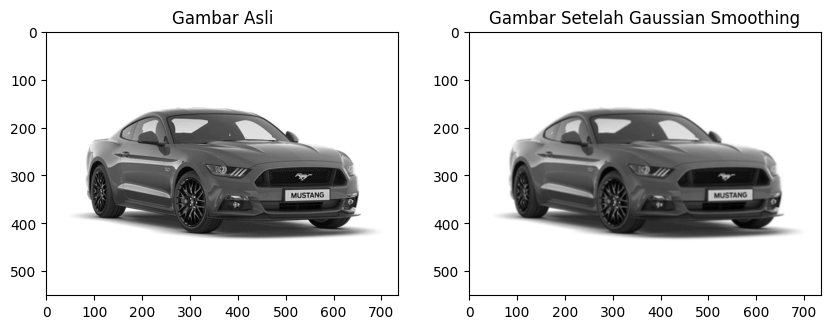

In [ ]:
# Langkah 6: Gaussian Smoothing
# Mengaplikasikan Gaussian Blur untuk smoothing
gaussian_blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Menampilkan hasil smoothing dengan Gaussian
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Gambar Asli")
plt.subplot(1, 2, 2)
plt.imshow(gaussian_blurred_image, cmap='gray')
plt.title("Gambar Setelah Gaussian Smoothing")
plt.show()


# Gambar Asli (Grayscale):
Pada gambar asli, detail lebih jelas dan intensitas piksel bervariasi tajam, yang terlihat pada tepi atau area yang kontras. Misalnya, jika ada garis atau bentuk yang jelas, mereka akan terlihat lebih tegas.

# Gambar Setelah Gaussian Smoothing:
 Setelah Gaussian Blur, gambar menjadi lebih homogen, dan perbedaan tajam antar intensitas piksel dihilangkan, memberikan kesan gambar lebih kabur atau lebih halus. Namun, meskipun smoothing berhasil mengurangi noise, tepi-tepi yang lebih tajam juga ikut terpengaruh dan menjadi lebih kabur.

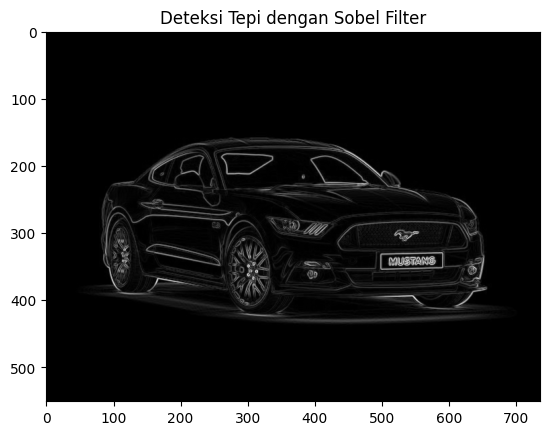

In [ ]:
# Langkah 7: Deteksi Tepi dengan Sobel Filter
# Menggunakan Sobel filter untuk deteksi tepi
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)  # Sobel di arah X
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)  # Sobel di arah Y
sobel_edges = cv2.magnitude(sobel_x, sobel_y)  # Magnitude dari hasil Sobel

# Menampilkan hasil deteksi tepi menggunakan Sobel
plt.imshow(sobel_edges, cmap='gray')
plt.title("Deteksi Tepi dengan Sobel Filter")
plt.show()


# Tepi yang Terdeteksi:
 Hasil deteksi tepi dengan Sobel filter menunjukkan area-area gambar di mana terdapat perubahan tajam dalam intensitas piksel. Tepi-tepi ini biasanya menggambarkan batas objek, kontur, atau transisi antara area gelap dan terang dalam gambar.

# Kontras Tepi:
Tepi yang terdeteksi cenderung terlihat lebih terang atau lebih jelas dibandingkan dengan latar belakang karena perubahan intensitas yang tajam. Hasil ini memberi gambaran yang jelas tentang bentuk dan struktur objek dalam gambar.

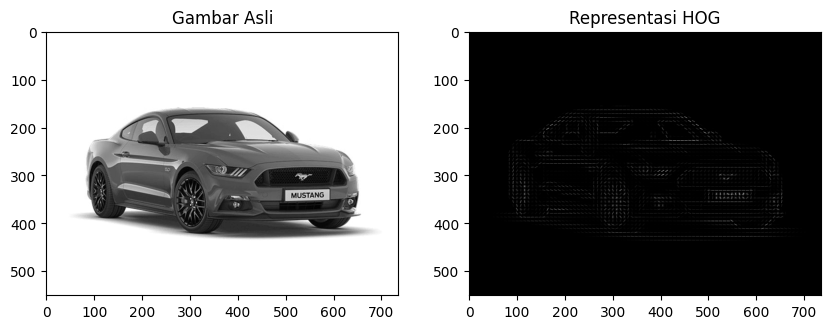

In [ ]:
# Langkah 8: Representasi Fitur dengan Histogram of Oriented Gradients (HOG)
# Menghitung fitur HOG dari gambar
fd, hog_image = hog(gray_image, block_norm='L2-Hys', visualize=True)

# Menampilkan hasil HOG
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Gambar Asli")
plt.subplot(1, 2, 2)
plt.imshow(hog_image, cmap='gray')
plt.title("Representasi HOG")
plt.show()

# Gambar Asli (Grayscale):
 Gambar asli memberikan informasi visual yang lebih jelas mengenai objek atau struktur dalam gambar, tetapi tidak memperlihatkan secara langsung arah atau pola gradien yang ada pada gambar tersebut.

# Hasil Representasi HOG:
Setelah menghitung fitur HOG, gambar yang dihasilkan memperlihatkan representasi dari orientasi gradien yang ada di dalam gambar. Biasanya, gambar HOG akan menunjukkan garis-garis atau bentuk yang lebih jelas, yang mewakili arah dan kekuatan gradien pada berbagai bagian gambar. Di bagian yang lebih terang pada gambar HOG, kita bisa melihat area dengan gradien yang lebih kuat atau tepi yang lebih signifikan.